import numpy as np
import matplotlib.pypIn this homework, we will use the Diabetes dataset. (Note: You can use the built-in function from ML libraries for gradient descent, training, and validation.)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

dataset = pd.read_csv('diabetes.csv')
dataset.head(20)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


# Problem 1 (30 points)
Using the diabetes dataset, build a logistic regression binary classifier for positive diabetes. Please use 80% and 20% split between training and evaluation (test). Make sure to perform proper scaling and standardization before your training. Report your results, including accuracy, precision, and recall. Also, plot the confusion matrix representing your binary classifier. 

In [2]:
X = dataset.iloc[:, [0,1,2,3,4,5,6,7]].values
Y = dataset.iloc[:, 8].values
X[0:20]

array([[6.000e+00, 1.480e+02, 7.200e+01, 3.500e+01, 0.000e+00, 3.360e+01,
        6.270e-01, 5.000e+01],
       [1.000e+00, 8.500e+01, 6.600e+01, 2.900e+01, 0.000e+00, 2.660e+01,
        3.510e-01, 3.100e+01],
       [8.000e+00, 1.830e+02, 6.400e+01, 0.000e+00, 0.000e+00, 2.330e+01,
        6.720e-01, 3.200e+01],
       [1.000e+00, 8.900e+01, 6.600e+01, 2.300e+01, 9.400e+01, 2.810e+01,
        1.670e-01, 2.100e+01],
       [0.000e+00, 1.370e+02, 4.000e+01, 3.500e+01, 1.680e+02, 4.310e+01,
        2.288e+00, 3.300e+01],
       [5.000e+00, 1.160e+02, 7.400e+01, 0.000e+00, 0.000e+00, 2.560e+01,
        2.010e-01, 3.000e+01],
       [3.000e+00, 7.800e+01, 5.000e+01, 3.200e+01, 8.800e+01, 3.100e+01,
        2.480e-01, 2.600e+01],
       [1.000e+01, 1.150e+02, 0.000e+00, 0.000e+00, 0.000e+00, 3.530e+01,
        1.340e-01, 2.900e+01],
       [2.000e+00, 1.970e+02, 7.000e+01, 4.500e+01, 5.430e+02, 3.050e+01,
        1.580e-01, 5.300e+01],
       [8.000e+00, 1.250e+02, 9.600e+01, 0.000e+00, 0.0

In [3]:
# split data set
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,train_size=0.8, test_size=0.2, random_state=1)

In [4]:
# scalling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)
X_train

array([[ 1.51659096,  0.75052361,  0.56475624, ...,  0.79582546,
         0.52952571,  0.56793202],
       [ 1.81201827,  0.24475163, -0.34790438, ...,  1.22865369,
        -0.06968859,  0.39844951],
       [ 0.92573636, -0.60873859,  0.26053603, ...,  0.70401341,
        -0.79424873,  0.99163829],
       ...,
       [ 2.69830017,  0.14991938,  1.07178992, ...,  1.51720584,
         0.36443605,  0.73741453],
       [ 0.03945446,  1.57240307,  0.1591293 , ...,  1.54343785,
         0.04648561, -0.61844554],
       [ 1.51659096, -0.60873859,  0.36194277, ...,  0.14002512,
         0.61512775,  1.07637954]])

In [5]:
# logistic regression from sklearn.linear_model
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state=0)
classifier.fit (X_train, Y_train)

LogisticRegression(random_state=0)

In [6]:
Y_pred = classifier.predict(X_test)
Y_pred[0:9]

array([0, 0, 0, 0, 0, 0, 0, 0, 0])

In [7]:
from sklearn.metrics import confusion_matrix
cnf_matrix = confusion_matrix(Y_test, Y_pred)
cnf_matrix

array([[89, 10],
       [24, 31]])

In [8]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(Y_test, Y_pred))
print("Precision:",metrics.precision_score(Y_test, Y_pred))
print("Recall:",metrics.recall_score(Y_test, Y_pred))

Accuracy: 0.7792207792207793
Precision: 0.7560975609756098
Recall: 0.5636363636363636


Text(0.5, 257.44, 'Predicted label')

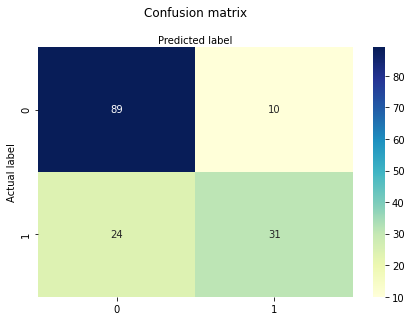

In [9]:
import seaborn as sns
class_names=[0,1] # name of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

# Problem 2 (30 points)
Using the diabetes dataset, build a Naïve Bays binary classifier for positive diabetes. Please use 80% and 20% split between training and evaluation (test). Make sure to perform proper scaling and standardization before your training. Report your results, including accuracy, precision, and recall. Also, plot the confusion matrix representing your binary classifier. Compare and analyze your results against problem 1.

In [10]:
import warnings
warnings.filterwarnings('ignore')

In [11]:
# from matplotlib.colors import ListedColormap
# X_set, Y_set = X_test, Y_test

# X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max()),
#                      np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max()))

# plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X),
#              alpha = 0.75, cmap = ListedColormap(('red', 'green')))

# plt.xlim(X1.min(), X1.max())
# plt.ylim(X2.min(), X2.max())
             
# for i, j in enumerate(np.unique(Y_set)):
#     plt.scatter(X_set[Y_set == j, 0], X_set[Y_set == j, 1],
#         c = ListedColormap(('yellow', 'blue'))(i), label = j)
             
# plt.title('Logistic Regression (Test set)')
# plt.xlabel('Age')
# plt.ylabel('Estimated Salary')
# plt.legend()

In [12]:
# Naive Gaussian Bays
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, Y_train)

GaussianNB()

In [13]:
Y2_pred = classifier.predict(X_test)
Y2_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0])

In [14]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm = confusion_matrix(Y_test, Y2_pred)
ac = accuracy_score(Y_test, Y2_pred)

In [15]:
cm

array([[85, 14],
       [21, 34]])

In [16]:
ac

0.7727272727272727

# Problem 3 (30 points)
Repeat problem 1, and this time use K-fold cross-validation for your training and validation. Perform the training two times for K=5 and K=10. Analyze and compare your results against problem 1. 

# Problem 4 (10 points)
Repeat problem 2, and this time use K-fold cross-validation for your training and validation. Does this make sense? Elaborate on your answer.

In [17]:
X_kf = dataset.iloc[:, [0,1,2,3,4,5,6,7]].values
Y_kf = dataset.iloc[:, 8].values
X_kf[0:10]

array([[6.000e+00, 1.480e+02, 7.200e+01, 3.500e+01, 0.000e+00, 3.360e+01,
        6.270e-01, 5.000e+01],
       [1.000e+00, 8.500e+01, 6.600e+01, 2.900e+01, 0.000e+00, 2.660e+01,
        3.510e-01, 3.100e+01],
       [8.000e+00, 1.830e+02, 6.400e+01, 0.000e+00, 0.000e+00, 2.330e+01,
        6.720e-01, 3.200e+01],
       [1.000e+00, 8.900e+01, 6.600e+01, 2.300e+01, 9.400e+01, 2.810e+01,
        1.670e-01, 2.100e+01],
       [0.000e+00, 1.370e+02, 4.000e+01, 3.500e+01, 1.680e+02, 4.310e+01,
        2.288e+00, 3.300e+01],
       [5.000e+00, 1.160e+02, 7.400e+01, 0.000e+00, 0.000e+00, 2.560e+01,
        2.010e-01, 3.000e+01],
       [3.000e+00, 7.800e+01, 5.000e+01, 3.200e+01, 8.800e+01, 3.100e+01,
        2.480e-01, 2.600e+01],
       [1.000e+01, 1.150e+02, 0.000e+00, 0.000e+00, 0.000e+00, 3.530e+01,
        1.340e-01, 2.900e+01],
       [2.000e+00, 1.970e+02, 7.000e+01, 4.500e+01, 5.430e+02, 3.050e+01,
        1.580e-01, 5.300e+01],
       [8.000e+00, 1.250e+02, 9.600e+01, 0.000e+00, 0.0

In [18]:
sc_X = StandardScaler()
X_kf = sc_X.fit_transform(X_kf)
X_kf[0:10]

array([[ 0.63994726,  0.84832379,  0.14964075,  0.90726993, -0.69289057,
         0.20401277,  0.46849198,  1.4259954 ],
       [-0.84488505, -1.12339636, -0.16054575,  0.53090156, -0.69289057,
        -0.68442195, -0.36506078, -0.19067191],
       [ 1.23388019,  1.94372388, -0.26394125, -1.28821221, -0.69289057,
        -1.10325546,  0.60439732, -0.10558415],
       [-0.84488505, -0.99820778, -0.16054575,  0.15453319,  0.12330164,
        -0.49404308, -0.92076261, -1.04154944],
       [-1.14185152,  0.5040552 , -1.50468724,  0.90726993,  0.76583594,
         1.4097456 ,  5.4849091 , -0.0204964 ],
       [ 0.3429808 , -0.15318486,  0.25303625, -1.28821221, -0.69289057,
        -0.81134119, -0.81807858, -0.27575966],
       [-0.25095213, -1.34247638, -0.98770975,  0.71908574,  0.07120427,
        -0.12597727, -0.676133  , -0.61611067],
       [ 1.82781311, -0.184482  , -3.57259724, -1.28821221, -0.69289057,
         0.41977549, -1.02042653, -0.36084741],
       [-0.54791859,  2.38188392

In [19]:
Y_kf[0:10]

array([1, 0, 1, 0, 1, 0, 1, 0, 1, 1])

In [20]:
# kFold, n=5
from sklearn.model_selection import KFold
X_kf5 = X_kf
Y_kf5 = Y_kf
kf5 = KFold(n_splits = 5)
kf5.get_n_splits(X_kf)

kf5

KFold(n_splits=5, random_state=None, shuffle=False)


In [21]:
for train_index, test_index in kf5.split(X_kf):
    X_kf5_train, X_kf5_test = X_kf5[train_index], X_kf5[test_index]
    Y_kf5_train, Y_kf5_test = Y_kf5[train_index], Y_kf5[test_index]

In [22]:
# Logistic Regression for K-Folds
classifier.fit(X_kf5_train, Y_kf5_train)
Y_kf5_pred = classifier.predict(X_kf5_test)
Y_kf5_pred

array([0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1,
       0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0])

In [23]:
cnf_matrix_kf5 = confusion_matrix(Y_kf5_test,Y_kf5_pred)
cnf_matrix_kf5

array([[84, 15],
       [24, 30]])

In [24]:
print("Accuracy:",metrics.accuracy_score(Y_kf5_test,Y_kf5_pred))
print("Precision:",metrics.precision_score(Y_kf5_test,Y_kf5_pred))
print("Recall:",metrics.recall_score(Y_kf5_test,Y_kf5_pred))

Accuracy: 0.7450980392156863
Precision: 0.6666666666666666
Recall: 0.5555555555555556


Text(0.5, 257.44, 'Predicted label')

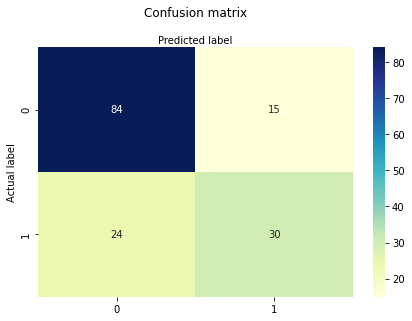

In [27]:
class_names = [0,1] # name of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks,class_names)
plt.yticks(tick_marks,class_names)# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix_kf5), annot = True, cmap = "YlGnBu", fmt = 'g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix',y = 1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

[[40  6]
 [13 17]]
Accuracy: 0.75
Precision: 0.7391304347826086
Recall: 0.5666666666666667


Text(0.5, 257.44, 'Predicted label')

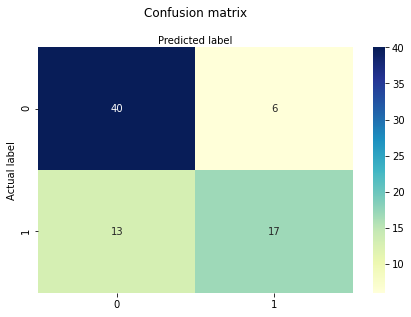

In [38]:
# kFold, n = 10
from sklearn.model_selection import KFold
X_kf10 = X_kf
Y_kf10 = Y_kf
kf10 = KFold(n_splits = 10)
kf10.get_n_splits(X_kf)

for train_index, test_index in kf10.split(X_kf):
    X_kf10_train, X_kf10_test = X_kf10[train_index], X_kf5[test_index]
    Y_kf10_train, Y_kf10_test = Y_kf10[train_index], Y_kf5[test_index]

classifier.fit(X_kf5_train, Y_kf5_train)
Y_kf10_pred = classifier.predict(X_kf10_test)
cnf_matrix_kf10 = confusion_matrix(Y_kf10_test,Y_kf10_pred)
print (cnf_matrix_kf10)

print("Accuracy:",metrics.accuracy_score(Y_kf10_test,Y_kf10_pred))
print("Precision:",metrics.precision_score(Y_kf10_test,Y_kf10_pred))
print("Recall:",metrics.recall_score(Y_kf10_test,Y_kf10_pred))

class_names = [0,1] # name of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks,class_names)
plt.yticks(tick_marks,class_names)# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix_kf10), annot = True, cmap = "YlGnBu", fmt = 'g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix',y = 1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')